In [57]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

# Load the dataset
file_path = "C:\\Users\\anush\\Desktop\\Obesity ML Research Project\\obesity_pre_processed_data.csv"
data = pd.read_csv(file_path)
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,-0.517665,-1.088317,-1.016339,1,0,-0.823906,0.211595,2,0,-0.074968,0,-1.217677,0.508987,2,3,1
1,0,-0.517665,-2.235215,-1.308625,1,0,0.997767,0.211595,2,1,1.574274,1,2.331641,-1.199517,1,3,1
2,1,-0.038570,0.976100,-0.541374,1,0,-0.823906,0.211595,2,0,-0.074968,0,1.148535,0.508987,0,3,1
3,1,0.919620,0.976100,-0.176016,0,0,0.997767,0.211595,2,0,-0.074968,0,1.148535,-1.199517,0,4,5
4,1,1.398715,-1.088317,-1.418232,0,1,-0.823906,0.211595,2,0,-0.074968,0,-1.217677,-1.199517,1,0,1


In [59]:


# Split the dataset into features and target variable
X = data.drop('NObeyesdad', axis=1)
y = data['NObeyesdad']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score, confusion_matrix


# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [77]:
# Predict probabilities for the test set
y_pred_proba = model.predict_proba(X_test)

# Predict class labels for the test set
y_pred = model.predict(X_test)


# Evaluate the model using accuracy
accuracy = model.score(X_test, y_test)
print(f'Accuracy: {accuracy}')

# Calculate Precision, Recall, and F1-Score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')


# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 0.8475177304964538
Precision: 0.8554063723975581
Recall: 0.8475177304964538
F1-Score: 0.842243681456864
Confusion Matrix:
[[28  0  0  0  0  0  0]
 [ 2 30  0  0  0  4  0]
 [ 0  0 35  2  1  0  1]
 [ 0  0  1 44  0  0  0]
 [ 0  0  0  0 62  0  0]
 [ 0  3  4  0  0 19  3]
 [ 0  1  9  1  0 11 21]]


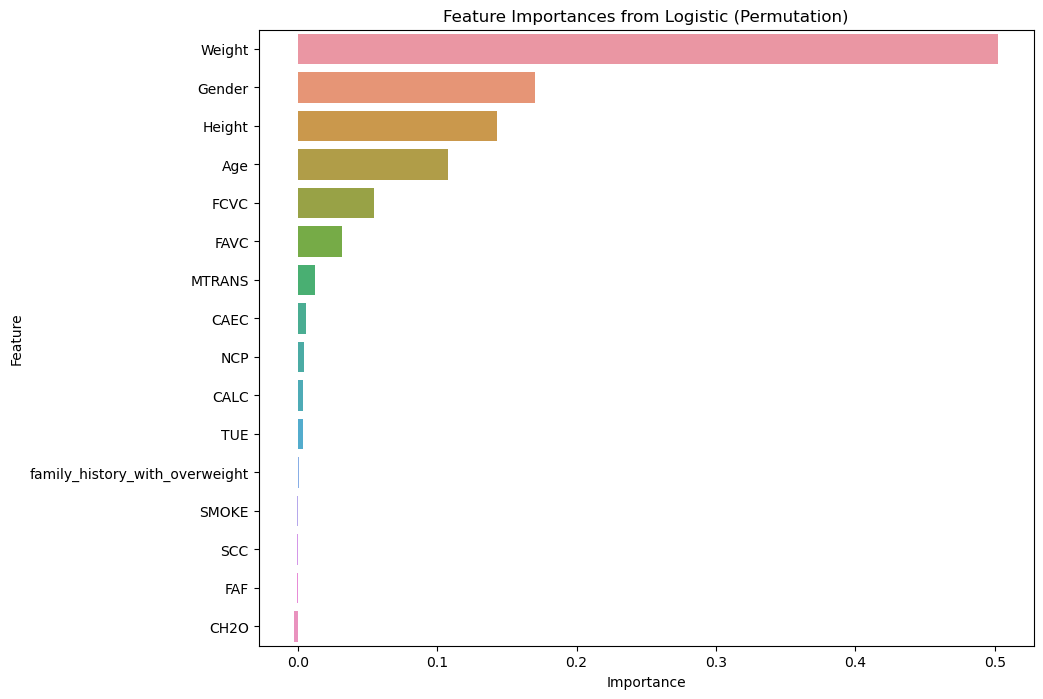

Top 5 important features:
   Feature  Importance
3  Weight    0.502482
0  Gender    0.169858
2  Height    0.142908
1     Age    0.107447
6    FCVC    0.054610


In [72]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate permutation importance
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

# Extract and sort feature importances
importances = perm_importance.importances_mean
features = X.columns
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances from Logistic (Permutation)')
plt.show()

# Print the top 5 important features
print("Top 5 important features:\n", feature_importances.head())
